# Campaign, Deployments, Events objects - demo

`pynsitu.events` implements a range of classes (objects) that are useful for the analysis of data relevant to an experimental field campaign, e.g. over a limited time period and an area.
This notebook describes these different classes which are from high to low levels:

- `Campaign`: this is the highest level object relevant to an in situ campaign (e.g. time periods, meta information, deployments, platforms and associated sensors, ...).
A campaign object is typically loaded from a yaml file (see [example](https://github.com/apatlpo/pynsitu/blob/main/pynsitu/tests/campaign.yaml)).
It is composed of `Deployments` objects, `Platforms` information and relevant meta data.
- `Platform`: a platform object contains `Deployments`, `Sensors` and meta data
- `Deployments`: a collection of `Deployments` with potential meta data.
- `Deployment`: single deployment with temporal and geographical start/end information and meta data.
- `Event`: An event is a low-level object describing deployments. It contains four elementary information: label, longitude, latitude, time.

<img src="schematics_events.jpg">

In [1]:
import pynsitu as pin

---

## Campaign

This is the top most class that describes the campaign.
It is loaded from a yaml file:

In [2]:
cp = pin.Campaign("../pynsitu/tests/campaign.yaml")
cp

Campaign(drixmed22 2022/09/21 to 2022/09/25)

`Campaign` objects contain first relevant meta data:
    
- `name`: name of the campaign
  
- `path`: a general path where campaign data is found
- `path_raw`: path to raw data, may be relative to `path` (if it does not start with `/`)
-  `path_processed`: path to processed data, may be relative to `path`
- `lon`, `lat`: longitude and latitude bounds
- `start`, `end`: temporal bounds 
- path to relevant datasets (e.g. bathymetry, coastline, ...)

Iterating over a `Campaign` returns a mix of `Deployments` and `Platform` objects:

In [3]:
for i in cp:
    print("label:", i, "; type:", type(cp[i]))

label: underway ; type: <class 'pynsitu.events.Deployment'>
label: tide_gauge ; type: <class 'pynsitu.events.Platform'>
label: europe ; type: <class 'pynsitu.events.Platform'>
label: drix ; type: <class 'pynsitu.events.Platform'>
label: drifter0 ; type: <class 'pynsitu.events.Platform'>
label: drifter1 ; type: <class 'pynsitu.events.Platform'>
label: drifter2 ; type: <class 'pynsitu.events.Platform'>
label: drifter3 ; type: <class 'pynsitu.events.Platform'>
label: drifter4 ; type: <class 'pynsitu.events.Platform'>
label: drifter5 ; type: <class 'pynsitu.events.Platform'>


One can iterate over all `Deployment` objects contained in the `Campaign` object:

In [4]:
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    print("; ".join([label, str(platform), str(sensor), str(deployment)]))

underway; None; None; underway / start 2022-09-21 06:30:00 / end 2022-09-25 15:10:00
laseyne; tide_gauge; None; laseyne / start 2022-09-20 17:48:30 5.89 43.11 / end 2022-09-21 04:50:00 5.89 43.11
fos0; tide_gauge; None; fos0 / start 2022-09-23 19:35:45 4.89 43.39 / end 2022-09-24 11:59:00 4.89 43.39
fos1; tide_gauge; None; fos1 / start 2022-09-24 13:24:30 4.90 43.38 / end 2022-09-24 15:16:00 4.90 43.38
calibration_ligne1; europe; adcp; calibration_ligne1 / start 2022-09-21 08:09:30 / end 2022-09-21 08:31:00
calibration_ligne2; europe; adcp; calibration_ligne2 / start 2022-09-21 08:32:44 / end 2022-09-21 08:52:00
calibration_ligne3; europe; adcp; calibration_ligne3 / start 2022-09-21 08:52:35 / end 2022-09-21 09:10:00
calibration_ligne4; europe; adcp; calibration_ligne4 / start 2022-09-21 09:10:23 / end 2022-09-21 09:26:00
d0; europe; adcp; d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00
d1; europe; adcp; d1 / start 2022-09-22 20:57:22 / end 2022-09-23 14:16:20
d2; europe; adcp

Select a `Deployment` within the list of top level deployments:

In [5]:
cp["underway"]

Deployment(underway / start 2022-09-21 06:30:00 / end 2022-09-25 15:10:00)

Loop over available platforms:

In [6]:
for label, p in cp.platforms.items():
    print(label, p)

tide_gauge Platform tide_gauge
 general deployments: laseyne / fos0 / fos1

europe Platform europe
 sensors: adcp / ctd

drix Platform drix
 sensors: adcp / ctd

drifter0 Platform drifter0
 general deployments: d0

drifter1 Platform drifter1
 general deployments: d0

drifter2 Platform drifter2
 general deployments: d0

drifter3 Platform drifter3
 general deployments: d0

drifter4 Platform drifter4
 general deployments: d0

drifter5 Platform drifter5
 general deployments: d0



Inspect one platform and its meta data:

In [7]:
print(cp["drix"])
print(cp["drix"]["meta"])

Platform drix
 sensors: adcp / ctd

{'label': 'drix', 'color': 'crimson'}


You can access meta data directly:

In [8]:
cp["drix"]["color"]

'crimson'

Loop over all sensors of a `Platform`:

In [9]:
for s in cp["drix"].sensors():
    print(s)

adcp
ctd


Note: you can access sensor `Deployments` object with `cp["drix"][s]`

A `Sensor` is described by a `Deployments` collection:

In [10]:
cp["drix"]["adcp"]

Deployments(adcp
calibration_ligne1
calibration_ligne2
calibration_ligne3
calibration_ligne4
d0
d1
d2)

Loop over all sensor `Deployment`s:

In [11]:
for label, d in cp["europe"]["adcp"].items():
    print(label, ":", d)

calibration_ligne1 : calibration_ligne1 / start 2022-09-21 08:09:30 / end 2022-09-21 08:31:00
calibration_ligne2 : calibration_ligne2 / start 2022-09-21 08:32:44 / end 2022-09-21 08:52:00
calibration_ligne3 : calibration_ligne3 / start 2022-09-21 08:52:35 / end 2022-09-21 09:10:00
calibration_ligne4 : calibration_ligne4 / start 2022-09-21 09:10:23 / end 2022-09-21 09:26:00
d0 : d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00
d1 : d1 / start 2022-09-22 20:57:22 / end 2022-09-23 14:16:20
d2 : d2 / start 2022-09-23 15:54:46 / end 2022-09-23 17:28:25
d3 : d3 / start 2022-09-25 05:25:12 / end 2022-09-25 10:55:49


Select a single `Deployment`

In [12]:
cp["europe"]["adcp"]["d0"]

Deployment(d0 / start 2022-09-21 18:26:00 / end 2022-09-22 12:42:00)

### show Campaign timeline

Note that options are available to turn on/off some information displays

<Axes: title={'center': 'drixmed22'}>

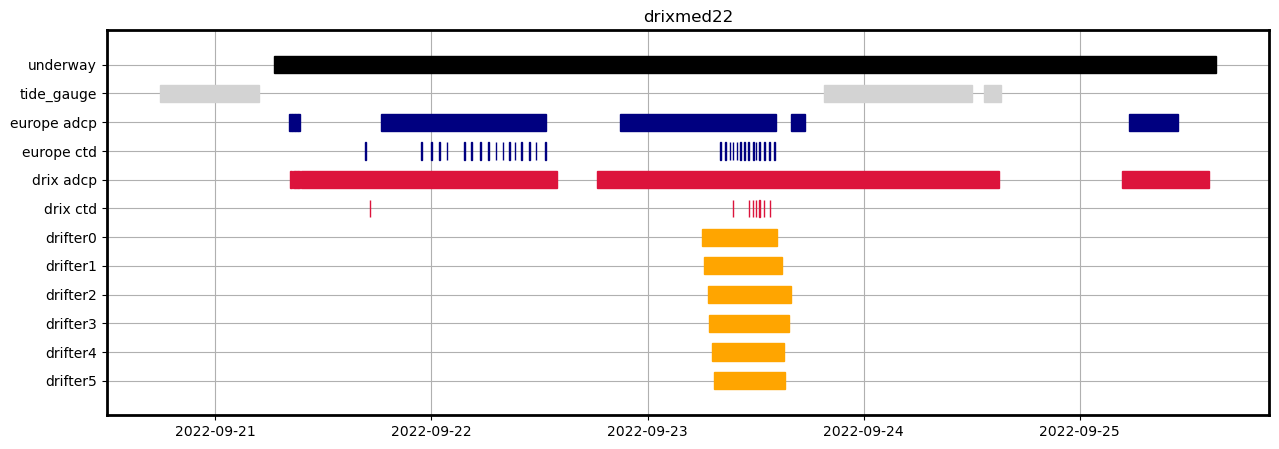

In [13]:
cp.timeline()

---
## make maps

The campaign object is linked to geographical objects and mapping methods (see **XXX link to map doc XXX**)

Link to bathymetric datasets:

- [ETOPO](https://www.ncei.noaa.gov/products/etopo-global-relief-model)

The local path to any dataset used by `pynsitu` should be specied in the `~/.config/pynsitu/pynsitu.yaml` file.


### with cartopy

without bathymetry:

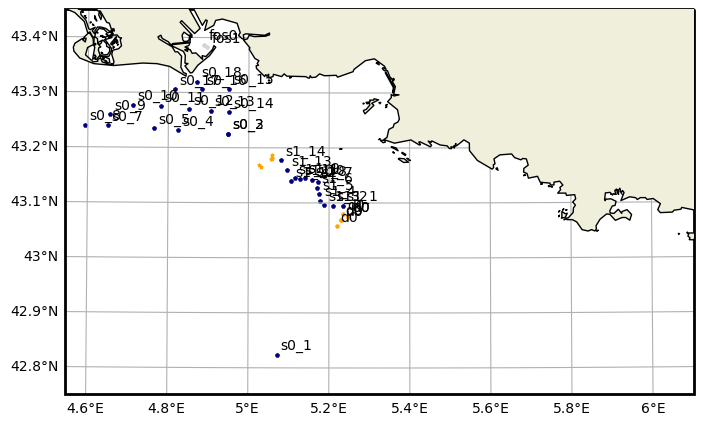

In [14]:
fig, ax, cbar = cp.map(bathy=False, coastline="h")  # bathy_fill=False,

# add all deployments
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    if "color" in meta:
        c = meta["color"] if "color" in meta else "0.5"
    deployment.plot_on_map(ax, color=c, label=True, label_xyshift=(0.01, 0.01))

with bathymetric file (see `pynsitu/tests/campaign.yaml`)

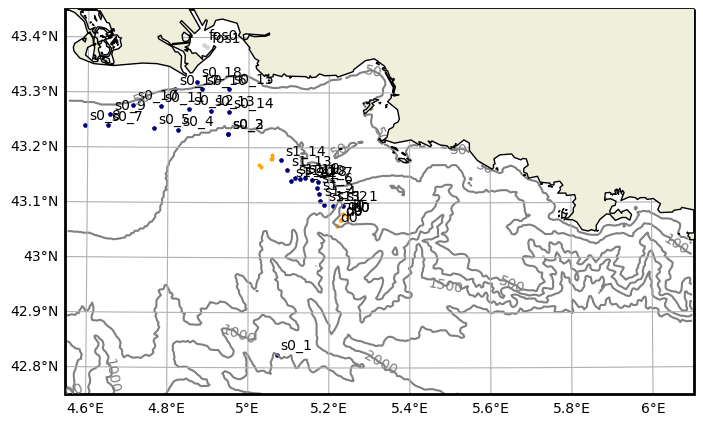

In [15]:
fig, ax, cbar = cp.map(bathy_fill=False, coastline="h")

# add all deployments
for label, deployment, platform, sensor, meta in cp.get_all_deployments():
    if "color" in meta:
        c = meta["color"] if "color" in meta else "0.5"
    deployment.plot_on_map(ax, color=c, label=True, label_xyshift=(0.01, 0.01))

varition with colors:

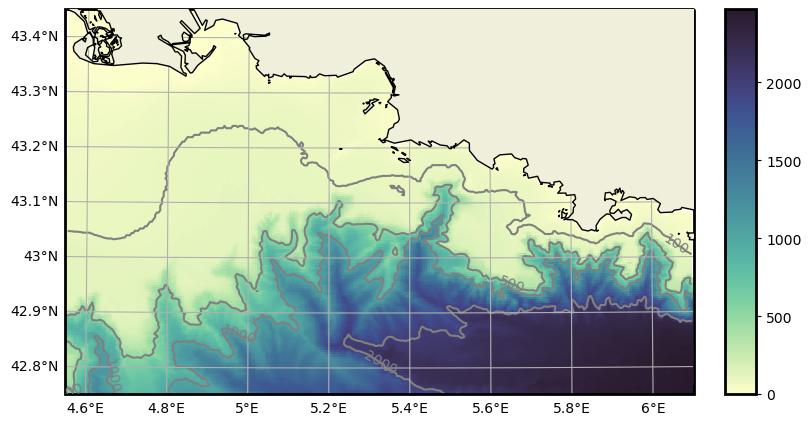

In [16]:
cp.map(coastline="h", bathy_levels=[0, 100, 500, 1000, 2000], bathy_fill=True);

### with folium

See 

In [17]:
cp.map_folium()